In [106]:
import matplotlib.pyplot as  plt
import numpy  as np
from PIL import  Image


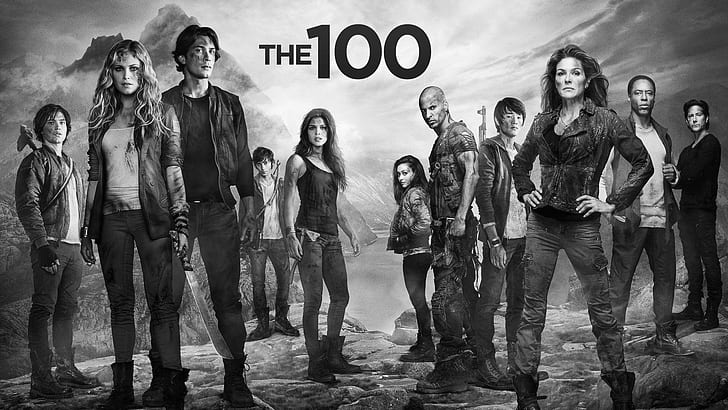

In [107]:
image = Image.open('/Users/user/Desktop/CV/images/the-100-wallpaper-preview.jpg').convert('L')
image

In [108]:
image = np.array(image)

Text(0.5, 1.0, '(410, 728)')

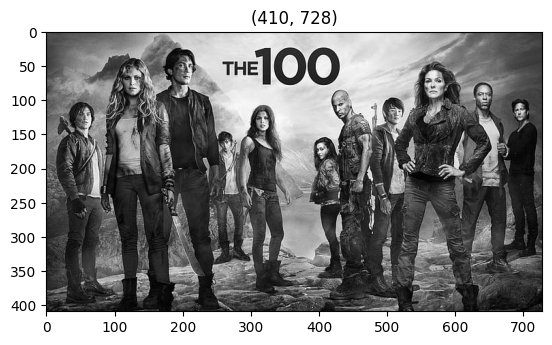

In [109]:
plt.imshow(image,cmap='gray')
plt.title(image.shape)

In [110]:
import  os
def get_size(path):
    try:
        file_size = os.path.getsize(path)
        size =  file_size/(1024*1024)
        return f'{round(size,2)} mb'
    except FileNotFoundError:
        return None

In [111]:
get_size('/Users/user/Desktop/CV/images/the-100-wallpaper-preview.jpg')

'0.09 mb'

In [112]:
u,sigma,V_T = np.linalg.svd(image,full_matrices=False)

In [113]:
K=50
sigma  = sigma[:K]
s_matrix = np.diag(sigma)
u = u[:,:K]
V_T = V_T[:K,:]
compressed = np.dot(u,np.dot(s_matrix,V_T))
clipped_img = np.clip(compressed,0,255).astype(np.uint8)

(-0.5, 727.5, 409.5, -0.5)

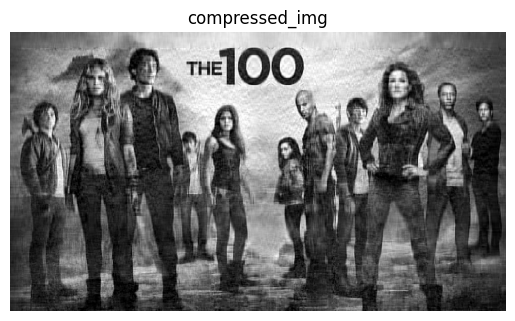

In [114]:
plt.title('compressed_img')
plt.imshow(clipped_img,cmap='gray')
plt.axis('off')

In [115]:


# Convert numpy array to PIL image
gray_img = Image.fromarray(clipped_img, mode='L')

# Convert grayscale PIL image to RGB
rgb_img = gray_img.convert("RGB")

# Save as RGB JPEG
rgb_img.save("compressed_rgb.jpg", quality=80)


In [121]:
real_image = Image.open('/Users/user/Desktop/CV/images/the-100-wallpaper-preview.jpg')

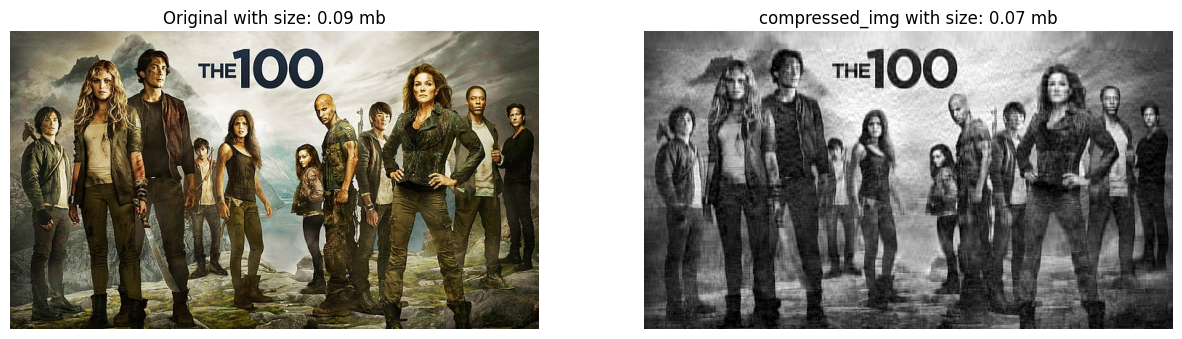

In [122]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title(f'Original with size: {get_size("/Users/user/Desktop/CV/images/the-100-wallpaper-preview.jpg")}')
plt.imshow(real_image)
plt.axis('off')

plt.subplot(122)
plt.title(f'compressed_img with size: {get_size("/Users/user/Desktop/CV/images/compressed_rgb.jpg")}')
plt.imshow(rgb_img)
plt.axis('off')

plt.show()